# **Random Forest**




## 1. Load and Prepare Datasets

Importing Packages

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib as plt
from sklearn.metrics import  recall_score, f1_score,roc_auc_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

## Importing Datasets

Importing the preprocessed and presplit datasets from the first experiment

In [ ]:
X_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/train_data.csv')
X_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/dev_data.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/test_data.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_train.csv')
y_dev = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_dev.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/shalimarchalhoub/Rephurase_MLAA/main/y_test.csv')

In [ ]:
#Checking the shapes of the datasets

print("The size of X_train is:",X_train.shape)
print("The size of X_dev is:",X_dev.shape)
print("The size of X_test is:",X_test.shape)
print("The size of y_train is:",y_train.shape)
print("The size of y_dev is:", y_dev.shape)
print("The size of y_test is:",y_test.shape)

The size of X_train is: (82310, 36)
The size of X_dev is: (20578, 36)
The size of X_test is: (25723, 36)
The size of y_train is: (82310, 1)
The size of y_dev is: (20578, 1)
The size of y_test is: (25723, 1)


In [ ]:
#Distribution of the target values in the train dataset
y_train.value_counts()

Target
0         80056
1          2254
dtype: int64

In [ ]:
#Distribution of the target values in the dev dataset
y_dev.value_counts()

Target
0         20015
1           563
dtype: int64

In [ ]:
#Distribution of the target values in the test dataset
y_test.value_counts()

Target
0         25019
1           704
dtype: int64

## Modeling

### Assesing Baseline Model

In [ ]:
# Creating a database filled with 1
y_base = np.full(y_train.shape, 1)

# Calculating the recall score
print("The Recall Score of this model is:",recall_score(y_train, y_base))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_train, y_base))


The Recall Score of this model is: 1.0
The f1 Score of this model is: 0.053308736578212945


### Train Random Forest Classifier

## HyperParamter Tuning

In [ ]:
#creating a hyperparameter grid of parameters we want to test

from scipy.stats import randint
hyperparams_grid = {
    'n_estimators': np.arange(30, 120, 20),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_leaf': np.arange(10, 26, 4)
    }

In [ ]:
#importing the DecisionTreeClassifier and creating an object
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(random_state=8)

In [ ]:
#creating a GridSearchCV model
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=2, verbose=1)

In [ ]:
#fitting the model on the training data
grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([10, 14, 18, 22]),
                         'n_estimators': array([ 30,  50,  70,  90, 110])},
             verbose=1)

In [ ]:
#checking the best parameters on the data
grid_search_rf.best_params_

{'max_depth': 25, 'min_samples_leaf': 10, 'n_estimators': 30}

In [ ]:
#predicting the y_train_preds
y_train_preds = grid_search_rf.predict(X_train)

#Checking the scores
print("The Recall Score of this model is:",recall_score(y_train, y_train_preds))

# Calculating the accuracy score
print("The f1 Score of this model is:",f1_score(y_train, y_train_preds))

#Checking the Confusion Matrix
confusion_matrix(y_train, y_train_preds)

The Recall Score of this model is: 0.6446317657497782
The f1 Score of this model is: 0.7749333333333335


array([[80013,    43],
       [  801,  1453]])

Predicting Dev data

In [ ]:
#Making dev Predictions
y_dev_preds = grid_search_rf.predict(X_dev)

#Checking recall the scores
print("The Recall Score of this model is:",recall_score(y_dev, y_dev_preds))

# Calculating the f1 score
print("The f1 Score of this model is:",f1_score(y_dev, y_dev_preds))

#Checking the Confusion Matrix
confusion_matrix(y_dev, y_dev_preds)

The Recall Score of this model is: 0.5790408525754884
The f1 Score of this model is: 0.7188533627342889


array([[19997,    18],
       [  237,   326]])

Test Dataset

In [ ]:
#Making Predictions
y_test_preds = grid_search_rf.predict(X_test)

#Checking the scores
print("The Recall Score of this model is:",recall_score(y_test, y_test_preds))

# Calculating the accuracy score
print("The f1 Score of this model is:",f1_score(y_test, y_test_preds))

#Checking the Confusion Matrix
confusion_matrix(y_test, y_test_preds)

The Recall Score of this model is: 0.5909090909090909
The f1 Score of this model is: 0.7317502198768688


array([[25002,    17],
       [  288,   416]])

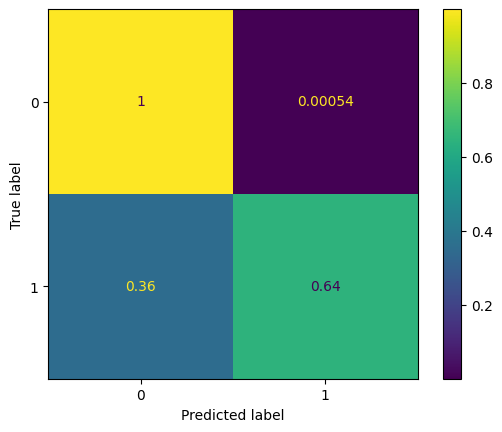

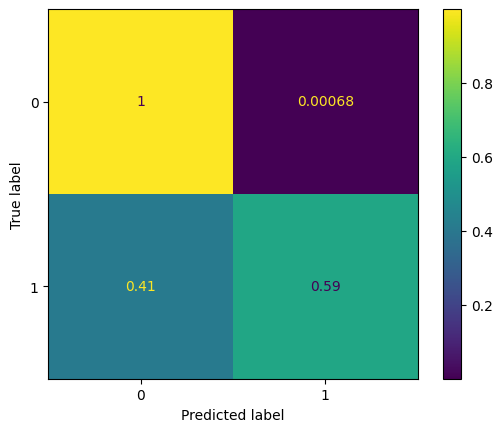

In [ ]:
#plotting the confusion matrix for train and test
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(grid_search_rf, X_test, y_test, normalize='true')